In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

from flows.flows import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Training

## BCE $C$ Parametrization

In [4]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'tanh/'):
    os.mkdir(filestr + 'tanh/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

## MSE $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'tanh/'):
    os.mkdir(filestr + 'tanh/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

## MLC $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

## SQR $C$ Parametrization

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

# MAEs

In [4]:
d = 4

dat_target = make_target(d)
sim_target = make_target(d)

dat_ckpt = tf.train.Checkpoint(dat_target)
sim_ckpt = tf.train.Checkpoint(sim_target)

dat_ckpt.restore('flows/dat6/ckpt-235')
sim_ckpt.restore('flows/sim3/ckpt-235')

2023-03-14 14:57:16.298277: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 14:57:16.956446: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22824 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:81:00.0, compute capability: 7.5


In [5]:
lr = lambda x: tf.math.exp(dat_target.log_prob(x) - sim_target.log_prob(x)).numpy()

In [6]:
X_mae = np.load('data/zenodo/fold/X_tst.npy')
lr_tst = np.load('data/zenodo/fold/lr_tst.npy')

In [7]:
def mae(model_lr):
    abs_dif = abs(model_lr(X_mae) - lr_tst)
    #print(np.mean(abs_dif < 100), end = ' ')
    return abs_dif[abs_dif < 100].mean()

## BCE

In [9]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [10]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1)
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

0.14966658 0.15346421 0.15029684
0.0036739656 0.0062510087 0.0042783413


In [ ]:
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')
(abs_dif_1 > 100).mean()

In [ ]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'$\sigma(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$\frac{1}{2}\left(\tanh{z} + 1\right)$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{BCE}(X)\Big| < t\right)$')
plt.title(r'BCE Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/bce_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## MSE

In [11]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [12]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1)
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

0.14965758 0.15323049 0.1507466
0.003114576 0.005368213 0.0036274202


In [ ]:
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')
(abs_dif_1 > 100).mean()

In [ ]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'$\sigma(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$\frac{1}{2}\left(\tanh{z} + 1\right)$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{MSE}(X)\Big| < t\right)$')
plt.title(r'MSE Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/mse_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## MLC

In [13]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [14]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1)
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

0.18895239 0.2480759 0.14602703
0.005693832 0.16634241 0.004604917


In [ ]:
abs_dif_3 = np.load(filestr + 'abs_dif_3.npy')
(abs_dif_3 > 100).mean()

In [ ]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'${\rm ReLU}(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$z^2$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\exp(z)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{MLC}(X)\Big| < t\right)$')
plt.title(r'MLC Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/mlc_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## SQR

In [15]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [16]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2, where = ~np.isnan(maes_2))
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

std_1 = np.std(maes_1, ddof = 1)
std_2 = np.std(maes_2, ddof = 1, where = ~np.isnan(maes_2))
std_3 = np.std(maes_3, ddof = 1)

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'maes_1.npy', maes_1)
np.save(filestr + 'maes_2.npy', maes_2)
np.save(filestr + 'maes_3.npy', maes_3)

np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'std_1.npy', std_1)
np.save(filestr + 'std_2.npy', std_2)
np.save(filestr + 'std_3.npy', std_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

print(avg_1, avg_2, avg_3)
print(std_1, std_2, std_3)

/tmp/ipykernel_8489/3780721232.py:4: RuntimeWarning: Mean of empty slice.
  return abs_dif[abs_dif < 100].mean()
/clusterfs/ml4hep/shahzar/miniconda/envs/multifold/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


0.2643403 0.817614 0.14872888
0.053267647 0.19081235 0.003600114


In [ ]:
abs_dif_3 = np.load(filestr + 'abs_dif_3.npy')
(abs_dif_3 > 100).mean()

In [ ]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'${\rm ReLU}(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$z^2$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\exp(z)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{SQR}(X)\Big| < t\right)$')
plt.title(r'SQR Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/sqr_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## AB MSE

In [ ]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/zenodo/ab_mse/set_{}/'.format(num)
mse_filestr = filestr + 'model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

ps = np.round(np.linspace(-2, 2, 101), 2)

In [ ]:
# Get model likelihood ratios.
avgs = []
for p in ps:
    print(p, end = '\t')
    lrs = [None] * reps
    params = {'loss':get_mse(p), 'd': 4}
    for i in range(reps):
        model = create_model(**params)
        model.load_weights(mse_filestr.format(p, i))
        lrs[i] = pow_odds_lr(model, p, m, s)
    
    maes = [mae(lr) for lr in lrs]
    avgs += [np.mean(maes)]

avgs = np.array(avgs)

In [ ]:
# Save results
np.save(filestr + 'avgs', avgs)

In [ ]:
avgs = np.load(filestr + 'avgs.npy')

In [ ]:
w = 3.5
h = 3.25              # Plots have dimension (w,h)

plt.figure(figsize = (w, h))

plt.plot(ps, avgs, c='blue', lw = 0.75)

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$p$')
plt.ylim(0, 1.25)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_mse_zenodo.png', 
            dpi=300, 
            bbox_inches='tight')

## AB SQR

In [ ]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/zenodo/ab_sqr/set_{}/'.format(num)
lin_filestr = filestr + 'relu/model_{}_{}.h5'
exp_filestr = filestr + 'exponential/model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

rs = np.sort(np.append(np.round(np.linspace(-2, 2, 81), 2),
                       np.round(np.linspace(-0.05, 0.05, 26), 3)[1:-1]))

In [ ]:
lin_avgs = []
exp_avgs = []

for r in rs:
    print(r, end = '\t')
    lin_lrs = [None] * reps
    exp_lrs = [None] * reps
    lin_params = {'loss': get_sqr(r), 'd': 4, 'output':'relu'}
    exp_params = {'loss': get_exp_sqr(r), 'd': 4, 'output':'linear'}
    
    for i in range(reps):
        lin_model = create_model(**lin_params)
        exp_model = create_model(**exp_params)
        
        lin_model.load_weights(lin_filestr.format(r, i))
        exp_model.load_weights(exp_filestr.format(r, i))
        
        lin_lrs[i] = pow_lr(lin_model, r, m, s)
        exp_lrs[i] = pow_exp_lr(exp_model, r, m, s)
    
    lin_maes = [mae(lr) for lr in lin_lrs]
    exp_maes = [mae(lr) for lr in exp_lrs]
    
    lin_avgs += [np.mean(lin_maes)]
    exp_avgs += [np.mean(exp_maes)]

In [ ]:
# Save results
lin_avgs = np.array(lin_avgs)
exp_avgs = np.array(exp_avgs)

np.save(filestr + 'lin_avgs', lin_avgs)
np.save(filestr + 'exp_avgs', exp_avgs)

In [ ]:
lin_avgs = np.load(filestr + 'lin_avgs.npy')
exp_avgs = np.load(filestr + 'exp_avgs.npy')

rs[lin_avgs == min(lin_avgs)], rs[exp_avgs == min(exp_avgs)]

In [ ]:
w = 3.5
h = 3.25              # Plots have dimension (w,h)

plt.figure(figsize = (w, h))

plt.plot(rs, lin_avgs, label=r'$\text{ReLU}(z)$', c='blue', lw = 0.75)
plt.plot(rs, exp_avgs, label=r'$\exp{z}$', c='red', lw = 0.75)
plt.legend()

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$r$')
#plt.ylim(0, 0.16)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_sqr_zenodo.png', 
            dpi=300, 
            bbox_inches='tight')

# Check NaNs

## BCE

In [ ]:
# Experiment parameters
num = 0
filestr = 'models/zenodo/c_bce/set_{}/'.format(num)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
X_mae = np.load('data/zenodo/fold/' + 'X_tst.npy')
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')

In [ ]:
bad = X_mae[np.any(abs_dif_1 > 100, axis = 0)]

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 1], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\eta$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_eta.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\phi$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_eta_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_eta_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 2], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 2], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_phi_m.png', 
            dpi=300, 
            bbox_inches='tight')

## MLC

In [ ]:
# Experiment parameters
num = 0
filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
X_mae = np.load('data/zenodo/fold/' + 'X_tst.npy')
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')

In [ ]:
bad = X_mae[np.any(abs_dif_1 > 100, axis = 0)]

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 1], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\eta$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_eta.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\phi$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 0], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_eta_phi.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 1], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_eta_m.png', 
            dpi=300, 
            bbox_inches='tight')

In [ ]:
plt.scatter(X[:, 2], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 2], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_phi_m.png', 
            dpi=300, 
            bbox_inches='tight')

# Random Slice

In [8]:
X = np.load('data/zenodo/fold/X_trn.npy')
y = np.load('data/zenodo/fold/y_trn.npy')

In [9]:
stats.mode(X)

ModeResult(mode=array([[218.1418   ,  -2.0407841,   4.4148946,  22.070618 ]],
      dtype=float32), count=array([[9, 6, 8, 9]]))

In [10]:
mode_pT = 218
mode_eta = 0
mode_phi = 4.4
mode_m = 22

## $\phi$ Scan

In [44]:
# Get a one-dimensional slice of test points.
phis = np.linspace(0, 2*np.pi, 1201).reshape(-1, 1)
pTs = np.repeat(mode_pT, len(phis)).reshape(-1, 1)
etas = np.repeat(mode_eta, len(phis)).reshape(-1, 1)
ms = np.repeat(mode_m, len(phis)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = phis
var_label = r'$\phi$'
var_string = 'phi'

lr_true = lr(xs)

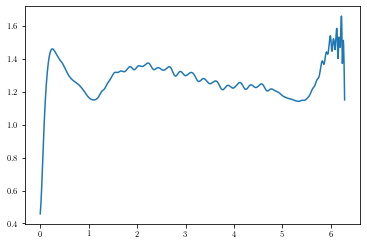

In [12]:
plt.plot(phis, lr_true)

### BCE

In [46]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [47]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [48]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [49]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

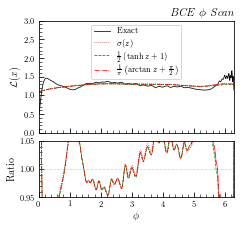

In [50]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [51]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\phi$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [52]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [53]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [54]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

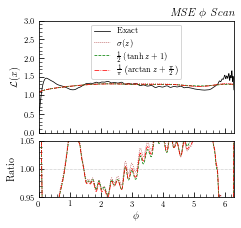

In [56]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [57]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [58]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [59]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [60]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

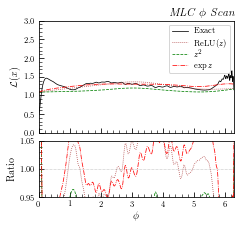

In [61]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [62]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [63]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [65]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [66]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

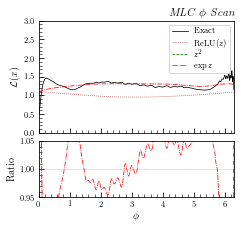

In [67]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

## $p_T$ Scan

In [68]:
# Get a one-dimensional slice of test points.
pTs = np.linspace(0, 750, 1201).reshape(-1, 1)
etas = np.repeat(mode_eta, len(pTs)).reshape(-1, 1)
phis = np.repeat(mode_phi, len(pTs)).reshape(-1, 1)
ms = np.repeat(mode_m, len(pTs)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = pTs
var_label = r'$p_T$'
var_string = 'pT'

lr_true = lr(xs)

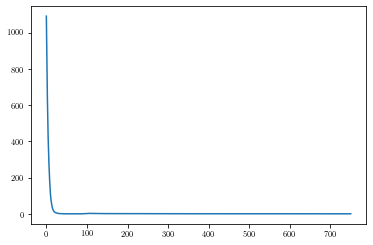

In [69]:
plt.plot(pTs, lr_true)

### BCE

In [70]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [71]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [72]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [73]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

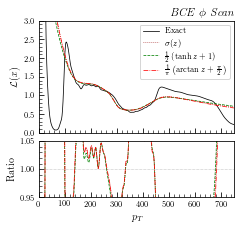

In [74]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [75]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\phi$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [76]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [77]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [78]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

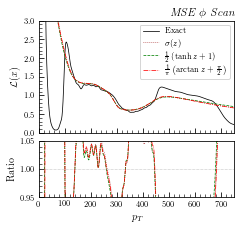

In [79]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [80]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [81]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [82]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [83]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

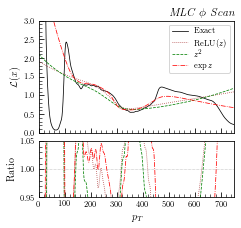

In [84]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [85]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [86]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [87]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [88]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

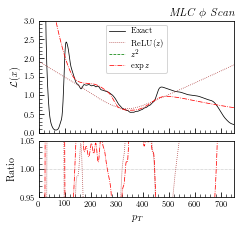

In [89]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

## $\eta$ Scan

In [90]:
# Get a one-dimensional slice of test points.
etas = np.linspace(-5, 5, 1001).reshape(-1, 1)
pTs = np.repeat(mode_pT, len(etas)).reshape(-1, 1)
phis = np.repeat(mode_phi, len(etas)).reshape(-1, 1)
ms = np.repeat(mode_m, len(etas)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = etas
var_label = r'$\eta$'
var_string = 'eta'

lr_true = lr(xs)

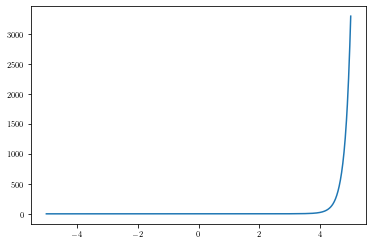

In [91]:
plt.plot(etas, lr_true)

### BCE

In [92]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [93]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [94]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [95]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

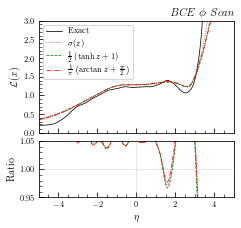

In [96]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [97]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\phi$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [98]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [99]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [100]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

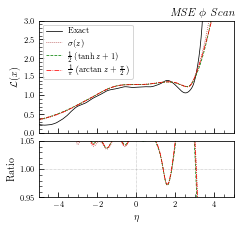

In [101]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [102]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [103]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [104]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [105]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

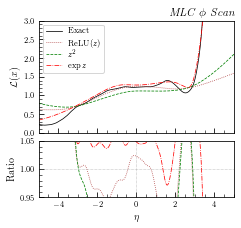

In [106]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [107]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [108]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [109]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [110]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

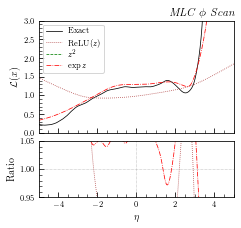

In [111]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

## $m$ Scan

In [112]:
# Get a one-dimensional slice of test points.
ms = np.linspace(0, 80, 1001).reshape(-1, 1)
pTs = np.repeat(mode_pT, len(ms)).reshape(-1, 1)
phis = np.repeat(mode_phi, len(ms)).reshape(-1, 1)
etas = np.repeat(mode_eta, len(ms)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, ms])
var = ms
var_label = r'$m$'
var_string = 'm'

lr_true = lr(xs)

lr_true = lr(xs)

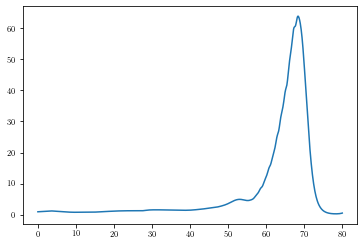

In [113]:
plt.plot(ms, lr_true)

### BCE

In [114]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it BCE $\phi$ Scan'
filename = 'plots/zenodo/scans/bce_phi.png'

In [115]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [116]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [117]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

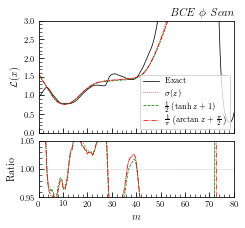

In [118]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [119]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = odds_lr
lr_calc_2 = tanh_lr
lr_calc_3 = arctan_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = r'\it MSE $\phi$ Scan'
filename = 'plots/zenodo/scans/mse_phi.png'

In [120]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [121]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [122]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

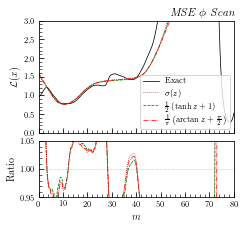

In [123]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [124]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [125]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [126]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [127]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

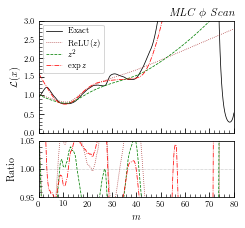

In [128]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [129]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

lr_calc_1 = pure_lr
lr_calc_2 = square_lr
lr_calc_3 = exp_lr

# Plotting
w = 3.5
h = 3.25
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = r'\it MLC $\phi$ Scan'
filename = 'plots/zenodo/scans/mlc_phi.png'

In [130]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = lr_calc_1(model_1, m, s)
    lrs_2[i] = lr_calc_2(model_2, m, s)
    lrs_3[i] = lr_calc_3(model_3, m, s)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [131]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'scans/{}/xs.npy'.format(var_string), xs)
np.save(filestr + 'scans/{}/preds_1.npy'.format(var_string), preds_1)
np.save(filestr + 'scans/{}/preds_2.npy'.format(var_string), preds_2)
np.save(filestr + 'scans/{}/preds_3.npy'.format(var_string), preds_3)

In [132]:
ensembles = [preds_1, preds_2, preds_3]
n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

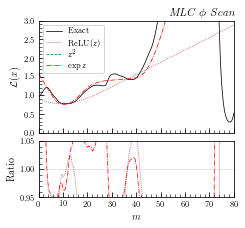

In [133]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')

# Plot likelihood ratios
axs[0].plot(var, lr_true, label = 'Exact', c = 'k', lw = 0.75)

for i in range(n):
    axs[0].plot(var, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(var[0], var[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(var, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(var_label)

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')